# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_raw['munResLat']

0       -11.93554
1       -11.93554
2       -11.93554
3       -12.13178
4       -11.93554
           ...   
27023   -12.74137
27024   -12.55684
27025   -12.74137
27026   -12.74137
27027   -11.70974
Name: munResLat, Length: 27028, dtype: float64

In [5]:
sinasc_raw['munResLat'].describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [6]:
sinasc_lat = pd.cut(sinasc_raw['munResLat'], [-14, -10.5, -8.6])
sinasc_lat

0        (-14.0, -10.5]
1        (-14.0, -10.5]
2        (-14.0, -10.5]
3        (-14.0, -10.5]
4        (-14.0, -10.5]
              ...      
27023    (-14.0, -10.5]
27024    (-14.0, -10.5]
27025    (-14.0, -10.5]
27026    (-14.0, -10.5]
27027    (-14.0, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-14.0, -10.5] < (-10.5, -8.6]]

In [7]:
sinasc_raw.pivot_table(values='CONSULTAS', index=['RACACOR', sinasc_lat],
                      aggfunc= ['sum','mean','min','max','median','std','var'])

sum      mean       min       max    median  \
                        CONSULTAS CONSULTAS CONSULTAS CONSULTAS CONSULTAS   
RACACOR  munResLat                                                          
Amarela  (-14.0, -10.5]       219  3.842105         3         4         4   
         (-10.5, -8.6]        213  3.610169         1         4         4   
Branca   (-14.0, -10.5]     12444  3.766344         1         9         4   
         (-10.5, -8.6]       7430  3.568684         1         9         4   
Indígena (-14.0, -10.5]      1093  3.053073         1         4         3   
         (-10.5, -8.6]        177  2.950000         1         9         3   
Parda    (-14.0, -10.5]     31542  3.691713         1         9         4   
         (-10.5, -8.6]      38178  3.455335         1         9         4   
Preta    (-14.0, -10.5]      1820  3.744856         1         9         4   
         (-10.5, -8.6]       1371  3.598425         1         9         4   

                              std       var  
                        CONSULTAS CONSULTAS  
RACACOR  munResLat                           
Amarela  (-14.0, -10.5]  0.367884  0.135338  
         (-10.5, -8.6]   0.830807  0.690240  
Branca   (-14.0, -10.5]  0.558321  0.311722  
         (-10.5, -8.6]   0.833777  0.695184  
Indígena (-14.0, -10.5]  0.843482  0.711461  
         (-10.5, -8.6]   1.577651  2.488983  
Parda    (-14.0, -10.5]  0.645714  0.416946  
         (-10.5, -8.6]   0.882498  0.778802  
Preta    (-14.0, -10.5]  0.664819  0.441984  
         (-10.5, -8.6]   0.760123  0.577787

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
sinasc_raw['munResArea']

0         7067.025
1         7067.025
2         7067.025
3         3958.273
4         7067.025
           ...    
27023    11518.915
27024     5126.723
27025    11518.915
27026    11518.915
27027      843.446
Name: munResArea, Length: 27028, dtype: float64

In [9]:
sinasc_raw['munResArea'].describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [10]:
sinasc_area = pd.cut(sinasc_raw['munResArea'], [450, 3000, 35000])
sinasc_area

0        (3000, 35000]
1        (3000, 35000]
2        (3000, 35000]
3        (3000, 35000]
4        (3000, 35000]
             ...      
27023    (3000, 35000]
27024    (3000, 35000]
27025    (3000, 35000]
27026    (3000, 35000]
27027      (450, 3000]
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[int64, right]): [(450, 3000] < (3000, 35000]]

In [11]:
sinasc_raw.pivot_table(values=['QTDPARTNOR', 'QTDPARTCES'], index=['RACACORMAE', sinasc_area],
                      aggfunc= ['sum','mean','min','max','median','std','var'],
                      margins=True,
                      margins_name='Total')

sum                  mean             \
                         QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR   
RACACORMAE munResArea                                                  
1.0        (450, 3000]        752.0      327.0   0.592126   0.257683   
           (3000, 35000]     2195.0     1311.0   0.572957   0.348115   
2.0        (450, 3000]        129.0       96.0   0.605634   0.450704   
           (3000, 35000]      319.0      409.0   0.517018   0.666124   
3.0        (450, 3000]         20.0       11.0   0.487805   0.268293   
           (3000, 35000]       35.0       30.0   0.522388   0.447761   
4.0        (450, 3000]       1967.0     1428.0   0.565230   0.410699   
           (3000, 35000]     7276.0     9923.0   0.494193   0.674667   
5.0        (450, 3000]          5.0        0.0   1.250000   0.000000   
           (3000, 35000]      134.0      695.0   0.334165   1.746231   
Total                       12302.0    13589.0   0.507257   0.560325   

                                min                   max             \
                         QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR   
RACACORMAE munResArea                                                  
1.0        (450, 3000]          0.0        0.0        3.0        6.0   
           (3000, 35000]        0.0        0.0        4.0       41.0   
2.0        (450, 3000]          0.0        0.0        5.0        6.0   
           (3000, 35000]        0.0        0.0        4.0        9.0   
3.0        (450, 3000]          0.0        0.0        2.0        3.0   
           (3000, 35000]        0.0        0.0        3.0        5.0   
4.0        (450, 3000]          0.0        0.0        4.0       10.0   
           (3000, 35000]        0.0        0.0       12.0       40.0   
5.0        (450, 3000]          0.0        0.0        3.0        0.0   
           (3000, 35000]        0.0        0.0        4.0       40.0   
Total                           0.0        0.0       12.0       40.0   

                             median                   std             \
                         QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR   
RACACORMAE munResArea                                                  
1.0        (450, 3000]          0.0        0.0   0.739902   0.677918   
           (3000, 35000]        0.0        0.0   0.726478   1.008677   
2.0        (450, 3000]          0.0        0.0   0.826659   0.907860   
           (3000, 35000]        0.0        0.0   0.758150   1.206667   
3.0        (450, 3000]          0.0        0.0   0.637258   0.633419   
           (3000, 35000]        0.0        0.0   0.804499   0.973646   
4.0        (450, 3000]          0.0        0.0   0.747362   0.911113   
           (3000, 35000]        0.0        0.0   0.750142   1.256310   
5.0        (450, 3000]          1.0        0.0   1.500000   0.000000   
           (3000, 35000]        0.0        1.0   0.702179   2.834374   
Total                           0.0        0.0   0.742055   1.145271   

                                var             
                         QTDPARTCES QTDPARTNOR  
RACACORMAE munResArea                           
1.0        (450, 3000]     0.547456   0.459572  
           (3000, 35000]   0.527770   1.017429  
2.0        (450, 3000]     0.683364   0.824209  
           (3000, 35000]   0.574791   1.456045  
3.0        (450, 3000]     0.406098   0.401220  
           (3000, 35000]   0.647218   0.947987  
4.0        (450, 3000]     0.558549   0.830127  
           (3000, 35000]   0.562713   1.578315  
5.0        (450, 3000]     2.250000   0.000000  
           (3000, 35000]   0.493055   8.033676  
Total                      0.550646   1.311647

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [12]:
sinasc_raw['munResAlt']

0        338.0
1        338.0
2        338.0
3        397.0
4        338.0
         ...  
27023    595.0
27024    340.0
27025    595.0
27026    595.0
27027    230.0
Name: munResAlt, Length: 27028, dtype: float64

In [13]:
sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [14]:
sinasc_raw['munResAlt'].value_counts()

munResAlt
87.0     8437
157.0    2182
139.0    1729
595.0    1590
177.0    1374
227.0     927
163.0     881
186.0     784
133.0     781
263.0     687
252.0     631
153.0     583
144.0     500
151.0     432
191.0     417
338.0     367
85.0      337
178.0     304
166.0     303
259.0     261
145.0     233
128.0     226
419.0     214
111.0     205
182.0     205
155.0     199
197.0     170
206.0     166
212.0     164
340.0     162
397.0     154
269.0     127
202.0     112
99.0      109
241.0     104
265.0      99
230.0      98
192.0      97
158.0      93
266.0      84
154.0      81
236.0      80
161.0      75
270.0      54
124.0      50
296.0      44
245.0      43
170.0      40
215.0      32
Name: count, dtype: int64

In [15]:
(595-85)/2

255.0

In [16]:
sinasc_alt = pd.cut(sinasc_raw['munResAlt'], [85, 255, 595])
sinasc_alt

0        (255, 595]
1        (255, 595]
2        (255, 595]
3        (255, 595]
4        (255, 595]
            ...    
27023    (255, 595]
27024    (255, 595]
27025    (255, 595]
27026    (255, 595]
27027     (85, 255]
Name: munResAlt, Length: 27028, dtype: category
Categories (2, interval[int64, right]): [(85, 255] < (255, 595]]

In [17]:
sinasc_raw.pivot_table(values=['QTDFILVIVO', 'QTDFILMORT'], index=['QTDPARTNOR', sinasc_alt],
                      aggfunc= ['sum','mean','min','max','median','std','var'],
                      margins = True,
                      margins_name='Total')

sum                  mean                   min  \
                      QTDFILMORT QTDFILVIVO QTDFILMORT QTDFILVIVO QTDFILMORT   
QTDPARTNOR munResAlt                                                           
0.0        (85, 255]      2964.0     8485.0   0.211292   0.603571        0.0   
           (255, 595]      591.0     2155.0   0.197593   0.719533        0.0   
1.0        (85, 255]      1160.0     4555.0   0.321152   1.206623        0.0   
           (255, 595]      144.0      632.0   0.295082   1.289796        0.0   
2.0        (85, 255]       626.0     3666.0   0.373731   2.114187        0.0   
           (255, 595]       69.0      388.0   0.396552   2.204545        0.0   
3.0        (85, 255]       312.0     2231.0   0.452830   3.090028        0.0   
           (255, 595]       35.0      265.0   0.416667   3.154762        0.0   
4.0        (85, 255]       187.0     1368.0   0.575385   4.071429        0.0   
           (255, 595]       19.0      138.0   0.593750   4.312500        0.0   
5.0        (85, 255]       109.0      764.0   0.751724   5.026316        0.0   
           (255, 595]        8.0       63.0   0.727273   5.250000        0.0   
6.0        (85, 255]        49.0      475.0   0.612500   5.937500        0.0   
           (255, 595]        1.0       30.0   0.200000   6.000000        0.0   
7.0        (85, 255]        24.0      255.0   0.666667   6.891892        0.0   
           (255, 595]        5.0       20.0   1.666667   6.666667        1.0   
8.0        (85, 255]        19.0       92.0   1.583333   7.666667        0.0   
           (255, 595]        2.0       44.0   0.400000   8.800000        0.0   
9.0        (85, 255]        13.0       89.0   1.300000   8.900000        0.0   
           (255, 595]        2.0       10.0   2.000000  10.000000        2.0   
10.0       (85, 255]         2.0       56.0   0.166667   4.666667        0.0   
           (255, 595]        0.0        0.0        NaN        NaN        NaN   
12.0       (85, 255]         1.0       24.0   1.000000  12.000000        1.0   
           (255, 595]        0.0        0.0        NaN        NaN        NaN   
14.0       (85, 255]         0.0       15.0   0.000000   7.500000        0.0   
           (255, 595]        0.0        0.0        NaN        NaN        NaN   
30.0       (85, 255]         0.0        3.0   0.000000   3.000000        0.0   
           (255, 595]        0.0        0.0        NaN        NaN        NaN   
40.0       (85, 255]         0.0        5.0        NaN   5.000000        NaN   
           (255, 595]        0.0        4.0   0.000000   4.000000        0.0   
41.0       (85, 255]         0.0        1.0        NaN   1.000000        NaN   
           (255, 595]        0.0        0.0        NaN        NaN        NaN   
Total                     6416.0    25645.0   0.259683   1.037965        0.0   

                                        max                median             \
                      QTDFILVIVO QTDFILMORT QTDFILVIVO QTDFILMORT QTDFILVIVO   
QTDPARTNOR munResAlt                                                           
0.0        (85, 255]         0.0        9.0        5.0        0.0        0.0   
           (255, 595]        0.0       28.0       30.0        0.0        1.0   
1.0        (85, 255]         0.0        6.0        5.0        0.0        1.0   
           (255, 595]        0.0        4.0        5.0        0.0        1.0   
2.0        (85, 255]         0.0        4.0        6.0        0.0        2.0   
           (255, 595]        0.0        3.0        6.0        0.0        2.0   
3.0        (85, 255]         0.0        6.0        6.0        0.0        3.0   
           (255, 595]        1.0        3.0        6.0        0.0        3.0   
4.0        (85, 255]         1.0        5.0        8.0        0.0        4.0   
           (255, 595]        4.0        3.0        7.0        0.0        4.0   
5.0        (85, 255]         2.0        8.0        8.0        0.0        5.0   
           (255, 595]       

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [18]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [19]:
# Mapear as cidades para suas regiões imediatas
sinasc_raw['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)

#  Convertendo a data para formato datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

# Calcular a idade média das mães por data e região
media_idade = sinasc_raw.groupby([sinasc_raw['DTNASC'].dt.to_period('M'), 'regiao_imediata'])['IDADEMAE'].mean().reset_index()
media_idade['DTNASC'] = media_idade['DTNASC'].dt.to_timestamp()

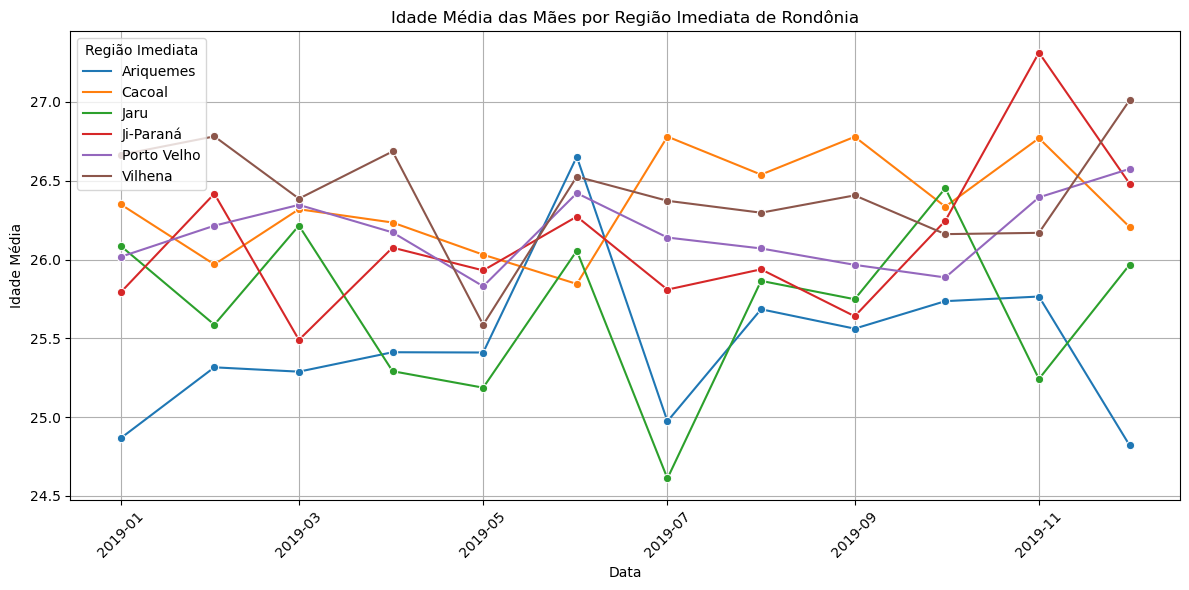

In [20]:
# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_idade, x='DTNASC', y='IDADEMAE', hue='regiao_imediata', marker='o')

plt.title('Idade Média das Mães por Região Imediata de Rondônia')
plt.xlabel('Data')
plt.ylabel('Idade Média')
plt.xticks(rotation=45)
plt.legend(title='Região Imediata')
plt.grid(True)

plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [21]:
df = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(df['municipio'], df['regiao']))
df.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [22]:
# Classificando o IDH
def mapear_idh(idh):
    if idh >= 0.8:
        return 'Muito Alto'
    elif idh >= 0.7:
        return 'Alto'
    elif idh >= 0.6:
        return 'Médio'
    elif idh >= 0.5:
        return 'Baixo'
    else:
        return 'Muito Baixo'

# Aplicar a função com map()
df['faixa_idh'] = df['idh'].map(mapear_idh)

df[['municipio', 'idh', 'faixa_idh']].head()

,municipio,idh,faixa_idh
0,Alta Floresta D'Oeste,0.641,Médio
1,Alto Alegre dos Parecis,0.592,Baixo
2,Alto Paraíso,0.625,Médio
3,Alvorada D'Oeste,0.643,Médio
4,Ariquemes,0.702,Alto


In [23]:
df.sort_values(by='idh', ascending=False).head()

,municipio,regiao,idh,ifdm,pib,faixa_idh
36,Porto Velho,Porto Velho,0.736,0.7257,17912070,Alto
51,Vilhena,Vilhena,0.731,0.7465,2831175,Alto
8,Cacoal,Cacoal,0.718,0.7111,2261644,Alto
23,Ji-Paraná,Ji-Paraná,0.714,0.7117,3783972,Alto
34,Pimenta Bueno,Cacoal,0.710,0.7383,1164877,Alto


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [24]:
# Classificando o IFDM
def mapear_ifdm(ifdm):
    if ifdm > 0.8:
        return 'Alto'
    elif ifdm >= 0.6:
        return 'Moderado'
    elif ifdm >= 0.4:
        return 'Regular'
    else:
        return 'Baixo'

# Aplicar a função com map()
df['faixa_ifdm'] = df['ifdm'].map(mapear_ifdm)

df[['municipio', 'ifdm', 'faixa_ifdm']].head()

,municipio,ifdm,faixa_ifdm
0,Alta Floresta D'Oeste,0.6337,Moderado
1,Alto Alegre dos Parecis,0.5046,Regular
2,Alto Paraíso,0.5735,Regular
3,Alvorada D'Oeste,0.5919,Regular
4,Ariquemes,0.7746,Moderado


In [25]:
df.sort_values(by='ifdm', ascending=False).head()

,municipio,regiao,idh,ifdm,pib,faixa_idh,faixa_ifdm
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,Alto,Moderado
51,Vilhena,Vilhena,0.731,0.7465,2831175,Alto,Moderado
34,Pimenta Bueno,Cacoal,0.710,0.7383,1164877,Alto,Moderado
36,Porto Velho,Porto Velho,0.736,0.7257,17912070,Alto,Moderado
23,Ji-Paraná,Ji-Paraná,0.714,0.7117,3783972,Alto,Moderado


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [26]:
# Classificando o PIB
def mapear_pib(pib):
    if pib > 1000000000:
        return 'Acima de 1 Bilhão'
    elif pib > 500000000:
        return 'Acima de 500 Milhões'
    elif pib > 300000000:
        return 'Acima de 300 Milhões'
    elif pib > 200000000:
        return 'Acima de 200 Milhões'
    elif pib > 100000000:
        return 'Acima de 100 Milhões'
    else:
        return 'Até 100 Milhões'

# Aplicar a função com map()
df['faixa_pib'] = df['pib'].map(mapear_pib)

df[['municipio', 'pib', 'faixa_pib']].head()

,municipio,pib,faixa_pib
0,Alta Floresta D'Oeste,496000,Até 100 Milhões
1,Alto Alegre dos Parecis,213410,Até 100 Milhões
2,Alto Paraíso,358000,Até 100 Milhões
3,Alvorada D'Oeste,204098,Até 100 Milhões
4,Ariquemes,2579830,Até 100 Milhões


In [27]:
df.sort_values(by='pib', ascending=False).head()

,municipio,regiao,idh,ifdm,pib,faixa_idh,faixa_ifdm,faixa_pib
36,Porto Velho,Porto Velho,0.736,0.7257,17912070,Alto,Moderado,Até 100 Milhões
23,Ji-Paraná,Ji-Paraná,0.714,0.7117,3783972,Alto,Moderado,Até 100 Milhões
51,Vilhena,Vilhena,0.731,0.7465,2831175,Alto,Moderado,Até 100 Milhões
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,Alto,Moderado,Até 100 Milhões
8,Cacoal,Cacoal,0.718,0.7111,2261644,Alto,Moderado,Até 100 Milhões


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Em média, a sobrevivência de filhos é maior quando o parto é normal do que quando é cesária.

Dentre os 3 índices (IDH, IFDM e PIB) vistos, 3 cidades se repetem entre as 5 melhores do estado. Porto Velho aparece com melhor IDH e PIB, porém no ranking de IFDM esse município é apenas o 4º. Isso é interessante de se notar, pois mmostra um nível de desenvolvimento de outros municípios, que nesse caso, o que lidera é Ariquemes.